# Handwritten Character recogniction using a CNN Model

In [2]:
import pandas as pd


train = pd.read_csv('../datasets/emnist-balanced-train.csv')
test = pd.read_csv('../datasets/emnist-balanced-test.csv')

In [3]:
# update column names for both datasets
columns = ['labels']
for i in range(train.shape[1]-1):
    columns.append(i)
    
train.columns = columns
test.columns = columns

classes = train['labels'].unique()
print('number of classes: ', len(classes))

train.head()
train.shape

number of classes:  47


(112799, 785)

In [4]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

# split training and validation data using sklearn
x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_val, Y_val) = mnist.load_data()

print(x_train.shape)
print(x_val.shape)

# x_train = np.array(x_train)
# x_train = x_train.reshape(x_train.shape[0], 28,28)
x_train = np.apply_along_axis(reshape_and_rotate, 1, x_train)
print(x_train.shape)

# x_val = np.array(x_val)
# x_val = x_val.reshape(x_val.shape[0], 28,28)
x_val = np.apply_along_axis(reshape_and_rotate, 1, x_val)

(90239, 784)
(22560, 784)
(90239, 28, 28)


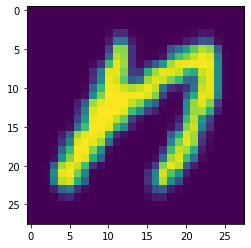

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3])

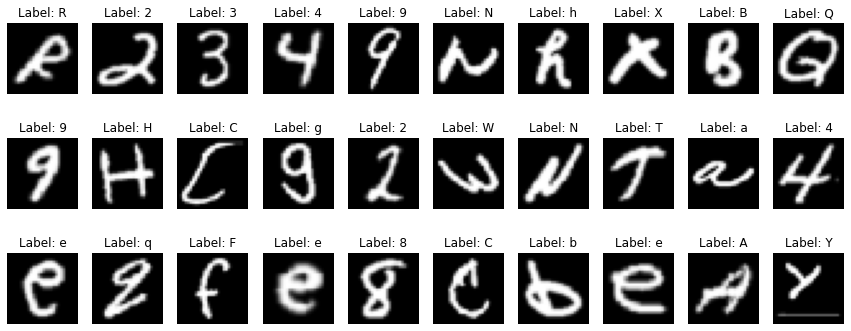

In [8]:
import random
test_samples = random.sample(range(0, len(x_train)), 30) 
pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {pred[y_train.iloc[i]]}')
    plt.axis('off')

In [9]:
x_train = x_train/255.0
x_val = x_val/255.0

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

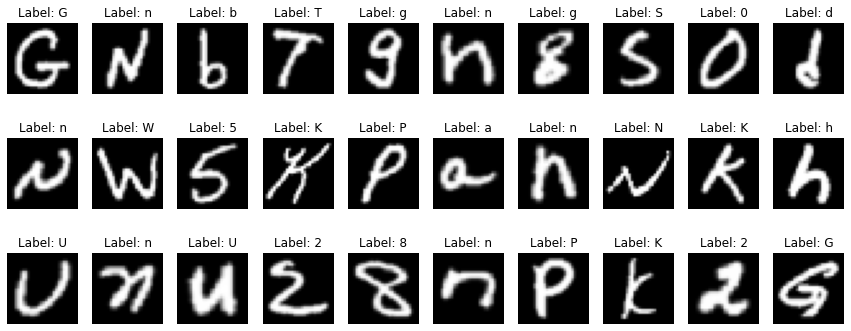

In [11]:
test_samples = random.sample(range(0, len(x_train)), 30) 
pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {pred[y_train.iloc[i]]}')
    plt.axis('off')

In [12]:
x_train[0].shape

(28, 28, 1)

In [13]:
input_shape = x_train[0].shape

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

2022-01-09 22:17:56.711098: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

In [38]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
2820/2820 [==============================] - 114s 40ms/step - loss: 1.1214 - accuracy: 0.6660 - val_loss: 0.4716 - val_accuracy: 0.8377
Epoch 2/10
2820/2820 [==============================] - 117s 41ms/step - loss: 0.6765 - accuracy: 0.7816 - val_loss: 0.4097 - val_accuracy: 0.8524
Epoch 3/10
2820/2820 [==============================] - 107s 38ms/step - loss: 0.5909 - accuracy: 0.8035 - val_loss: 0.3821 - val_accuracy: 0.8566
Epoch 4/10
2820/2820 [==============================] - 109s 39ms/step - loss: 0.5383 - accuracy: 0.8190 - val_loss: 0.3774 - val_accuracy: 0.8626
Epoch 5/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.5023 - accuracy: 0.8297 - val_loss: 0.3657 - val_accuracy: 0.8677
Epoch 6/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.4720 - accuracy: 0.8373 - val_loss: 0.3584 - val_accuracy: 0.8719
Epoch 7/10
2820/2820 [==============================] - 110s 39ms/step - loss: 0.4531 - accuracy: 0.8424 - val_loss: 0

In [39]:
model.evaluate(x_val, y_val)

705/705 [==============================] - 4s 5ms/step - loss: 0.3577 - accuracy: 0.8721


[0.3577237129211426, 0.8720744848251343]

In [40]:
model.save("models/EMNIST.h5")

In [16]:
from tensorflow import keras
model = keras.models.load_model('models/EMNIST.h5')

In [17]:
predictions = model.predict(x_val)

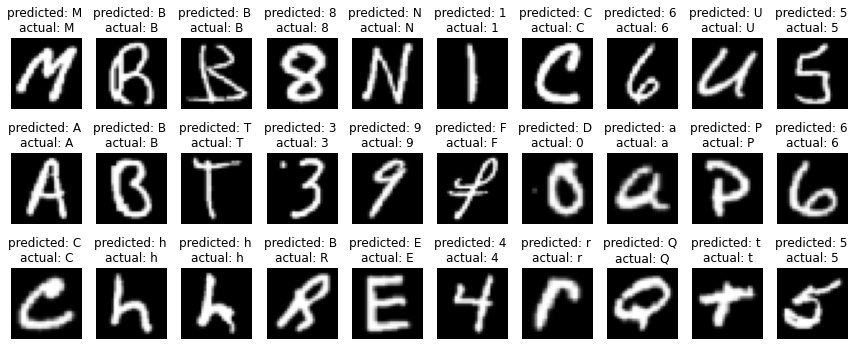

In [18]:
import random

pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']
test_samples = random.sample(range(0, len(x_val)), 30) 

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_val[i], cmap='gray')
    plt.title(f'predicted: {pred[np.argmax(predictions[i])]} \nactual: {pred[y_val.iloc[i]]}')
    plt.axis('off')

Character recognized : n


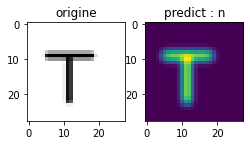

In [19]:
import cv2
from tensorflow.keras.preprocessing import image

img = cv2.imread("images/img.png")
plt.subplot(1, 3, 1)
plt.title("origine")
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img =  255.0 - img
img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.resize(img, (28, 28))

# plt.subplot(1, 3, 2)
# plt.title("process")
# plt.imshow(img)

# plt.subplot(1, 3, 3)
# plt.title("exemple")
# plt.imshow(x_val[0])

img_6 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img_6 = image.img_to_array(img_6)
img_6.reshape(28, 28)
img_6 = np.expand_dims(img_6, axis=0)


pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

pre = np.argmax(model.predict(img_6))
prediction = (model.predict(img_6) > 0.5).astype("int32")
print("Character recognized :", pred[pre])

plt.subplot(1, 3, 2) 
plt.title("predict : " + pred[pre]) 
plt.imshow(img)
